In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


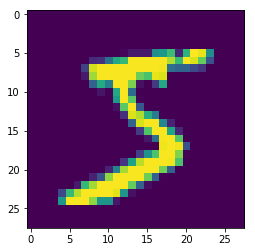

In [89]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [92]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [94]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [95]:
#added batch normalization, activation after every convolution except for the last one
from keras.layers import Activation,BatchNormalization

#Initialize linear stack model and add layers to it
model = Sequential()

# Input image = 28x28 with 1 channel
# Convolved with 3x3 with 10 kernels
# Output image will be = 26x26 with 10 channels
# Global Receptive field = 3x3
# Relu activation - linear activation function with not passing values < 0
# 0.25 dropout 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Input image = 26x26 with 10 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 24x24 with 16 channels
# Global Receptive field = 5x5
# Relu activation
# 0.25 dropout
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


# Input image = 24x24 with 16 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 22x22 with 16 channels
# Global Receptive field = 7x7
# Relu activation
# Dropout 0.10
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


# Input image = 22x22 with 16 channels
# Maxpooled with 2x2
# Output image will be = 11x11 with 16 channels
# Global Receptive field = 14x14
model.add(MaxPooling2D(pool_size=(2, 2)))

#---------------------MP------------------------#

# Input image = 11x11 with 16 channels
# Convolved with 1x1 with 8 kernels
# Output image will be = 11x11 with 8 channels
# Global Receptive field = 14x14
# Relu activation
model.add(Convolution2D(8, 1, 1))
model.add(Activation('relu'))
model.add(BatchNormalization())


# Input image = 11x11 with 8 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 9x9 with 16 channels
# Global Receptive field = 16x16
# Relu activation
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


# Input image = 9x9 with 16 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 7x7 with 16 channels
# Global Receptive field = 18x18
# Relu activation
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


# Input image = 7x7 with 16 channels
# Convolved with 1x1 with 10 kernels
# Output image will be = 7x7 with 10 channels
# Global Receptive field = 18x18
# Relu activation
model.add(Convolution2D(10, 1, activation='relu')) 
model.add(BatchNormalization())


# Input image = 7x7 with 10 channels
# Convolved with 7x7 with 10 kernels
# Output image will be = 1x1 with 10 channels
# Global Receptive field = 24x24
model.add(Convolution2D(10, 7))




model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_76 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_36 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
activation_67 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_77 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_37 (Dropout)         (None, 24, 24, 16)        0         
__________

In [0]:
from keras.optimizers import Adam

#using learning scheduler
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

In [105]:
model.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 12s 208us/step - loss: 0.0500 - acc: 0.9840 - val_loss: 0.0253 - val_acc: 0.9909
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 14s 227us/step - loss: 0.0370 - acc: 0.9885 - val_loss: 0.0326 - val_acc: 0.9899
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 12s 206us/step - loss: 0.0347 - acc: 0.9884 - val_loss: 0.0312 - val_acc: 0.9903
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 12s 206us/step - loss: 0.0295 - acc: 0.9908 - val_loss: 0.0242 - val_acc: 0.9918
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [108]:
print(score)

[0.020736965150013567, 0.9931]


###Iteration 4

*   Decreased the number of parameters by following right architecture
*   Total params: **12,948**
Trainable params: **12,764**
Non-trainable params: **184**


---



*   The architecture is changed to fit in lesser parameters by reducing the architecture to 7x7 using 3x3, and using 7x7x10 in the end step convolution.
*   Added dropout of 0.25
*   Added Adam as optimizer with learning rate set to 0.003 and used learning scheduler
*   Reduced batch size and increased number of epochs, introduced callbacks as per scheduler


*   Reached  **99.41 in 29th epoch**




---


*   Final accuracy in print score is **99.31**

In [0]:
y_pred = model.predict(X_test)

In [102]:
print(y_pred[:9])
print(y_test[:9])

[[4.3544355e-09 1.1734999e-08 1.5922989e-06 3.1040065e-06 1.4237281e-13
  9.9333874e-10 6.4911097e-13 9.9999487e-01 1.3435188e-08 3.7863435e-07]
 [9.2830605e-06 1.0234673e-06 9.9998963e-01 1.6377145e-09 3.0486265e-09
  3.6643254e-11 9.3296457e-08 5.1714171e-09 1.1796112e-08 2.0199885e-11]
 [1.5402094e-07 9.9999142e-01 2.9631036e-07 4.1143774e-10 7.2266757e-06
  1.2990827e-08 2.0879136e-07 3.7613748e-07 2.1278943e-07 1.2395998e-07]
 [9.9998438e-01 2.3821572e-13 2.1071450e-08 3.9316603e-08 3.1406358e-09
  1.8702806e-08 1.4968661e-05 3.7611991e-10 2.9579019e-07 1.8313614e-07]
 [5.5669587e-11 1.4865821e-10 9.1665710e-11 3.7495371e-12 9.9998891e-01
  2.6592827e-11 5.8900333e-09 2.0248729e-09 9.3998537e-08 1.0999453e-05]
 [2.0152950e-07 9.9996638e-01 6.6913009e-07 8.8042171e-11 2.5353658e-05
  6.9958933e-10 7.2911021e-08 6.7992701e-06 1.7588113e-07 3.2099763e-07]
 [1.4483429e-15 1.5102196e-09 5.6015172e-11 3.5110841e-13 9.9997866e-01
  5.5177776e-11 1.7216534e-11 9.6570304e-08 1.5108148e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [104]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored